<img src=Banner.png width=500 >

**Table of contents**<a id='toc0_'></a>    
- [EDA](#toc1_)    
  - [Reading and Importing the Data](#toc1_1_)    
  - [Handling Outliers](#toc1_2_)    
  - [Handling Missing Values](#toc1_3_)
  - [Statistical Analysis](#toc1_4_)    
   
- [Feature Selection and Preprocess](#toc2_)    
  - [Correlation Matrix](#toc2_1_)    
  - [Visulalization of Important Features Using JointPlot](#toc2_2_) 
  - [Preprocess the DataFeature Selection Using SelectKBest](#toc2_3_) 
  
- [Regression Training](#toc3_)   
  - [Training 4 Models](#toc3_1_) 
  - [Comparison](#toc3_2_)
  - [Tuning HyperParameters](#toc3_3_)

- [Evaluation Metrics Explanation](#toc4_)   
  - [RMS](#toc4_1_) 
  - [R Squared](#toc4_2_)
- [Bias Variance Tradeoff](#toc5_)   



## <a id='toc1_'></a>[Exploratory Data Analysis](#toc0_)  

> The Main Goal of EDA is to get to underestand the data. This Process is about reading the data, trying to underestand the features that affect the data, size of the dataset and many more information that can later guide us to perform a better data engineering and feature selection. 
This process is nessecory in order to later achieve better results in the regression analysis part.
----
Main Goals of this part are:
1. Read the data using `.info` 
2. Detect and Delete Outliers
3. Handle Missing Values
4. Perform a Statistical Analysis

### <a id='toc1_1_'></a>[Reading and Importing the Data](#toc0_)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("Housing.csv")
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

> `df.info` allows us to dive deeper into housing dataset, here are some charastristics of the dataset that draw attention:

1. The dataset contains 2,930 records and 82 columns, where the target is to determine `SalePrice` Using Regression.
2. The dataset includes detailed information about houses sold, covering aspects like location, physical characteristics, condition, and sale details, In total **80 Features**.
3. Features contain both numerical and categorical features.
4. As the first glance suggests, Features like Lot Frontage, Alley, Bsmt Qual, Garage Yr Blt, and Pool QC have many NA values.
5. Features like Lot Frontage and Garage Yr Blt include missing values and need imputation.

### <a id='toc1_2_'></a>[Handling Outliers](#toc0_)  

> Handling Outliers is done in 3 parts:
1. Visualizing distribution of the target or `SalePrice` using histplot and boxplot
2. Calculate the number of outliers using IQR method
3. Visualize distribution of the target after removing outlier

It is important to notice that it may be possible that other features may also include outliers but removing them may not be needed because removing the rows that contain outlier sale price will most likely remove outliers related to other features as well.

/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribition of Target before removing outliers')

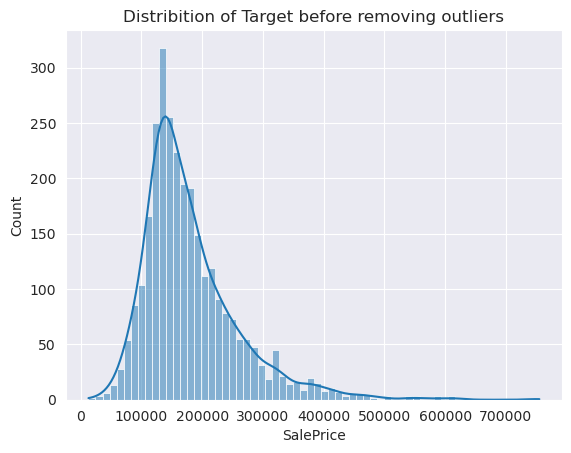

In [4]:
# Histogram of target = SalePrice
target = df['SalePrice']
sns.histplot(x = target , kde=True)
plt.title("Distribition of Target before removing outliers")

Text(0.5, 1.0, 'IQR of Target before removing outliers')

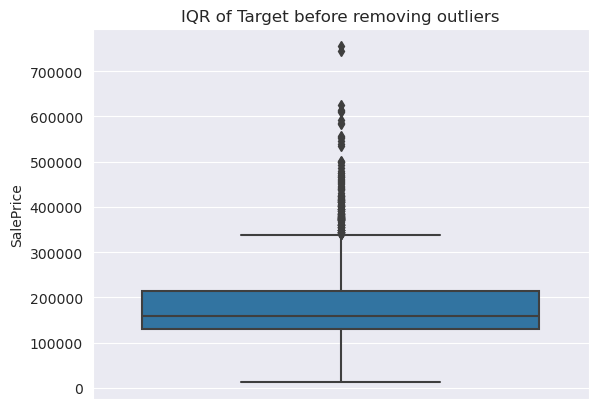

In [5]:
# Box plot of target where different IQRs and outliers are shown
sns.boxplot(y = target)
plt.title("IQR of Target before removing outliers")

In [6]:
# Detect Outliers using IQR method
Q1 = target.quantile(q = 0.25)
Q3 = target.quantile(q = 0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(target < lower_bound) | (target > upper_bound)]

num_outliers = outliers.shape[0]


/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Outliers in Price Distribution')

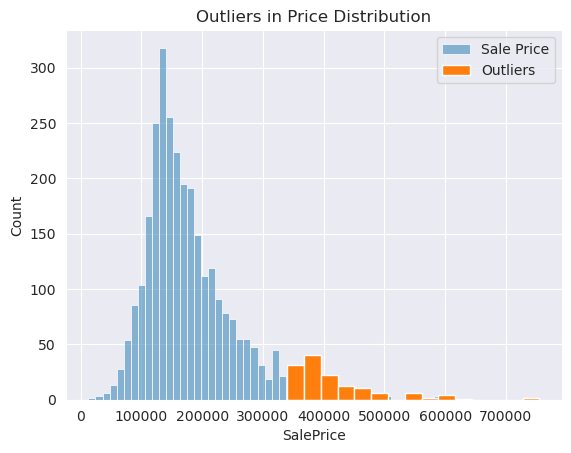

In [7]:
# Outliers Visualization
sns.histplot(target , label ='Sale Price' , alpha = 0.5)
sns.histplot(outliers['SalePrice'] , label = "Outliers" , alpha = 1)
plt.legend()
plt.title("Outliers in Price Distribution")

In [8]:
# Print results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {num_outliers}")

Q1: 129500.0
Q3: 213500.0
IQR: 84000.0
Lower Bound: 3500.0
Upper Bound: 339500.0
Number of Outliers: 137


In [9]:
# Removing Outliers
df_cleaned = df[(target >= lower_bound ) & (target <= upper_bound)]


In [10]:
# Print the number of records before and after
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")


Original dataset size: 2930
Cleaned dataset size: 2793


/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribition of Target after removing outliers')

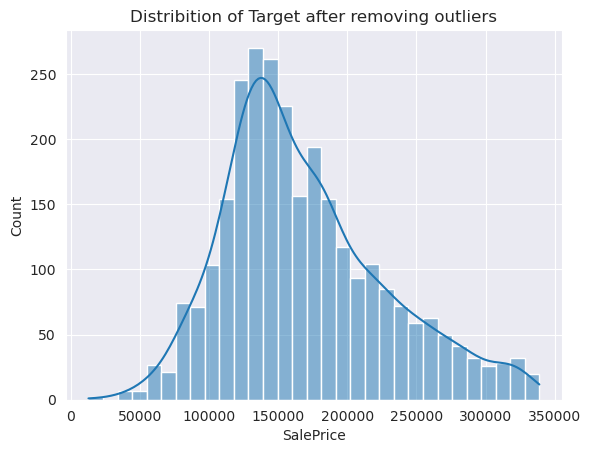

In [11]:
# Histogram of target = SalePrice
target_cleaned = df_cleaned['SalePrice']
sns.histplot(x = target_cleaned , kde=True)
plt.title("Distribition of Target after removing outliers")

Text(0.5, 1.0, 'Box plot of price Distribution after removing outliers')

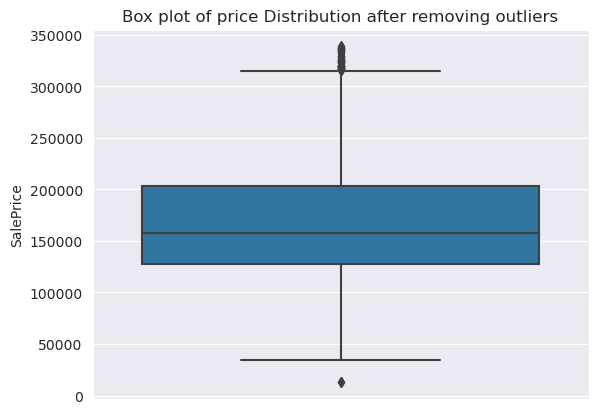

In [12]:
sns.boxplot(y = target_cleaned)
plt.title("Box plot of price Distribution after removing outliers")

### <a id='toc1_3_'></a>[Handling Missing Values](#toc0_)  

> This Part includes 3 tasks: 
1. Detect and summerize Missing values for each feature

2. Imputation : For **Categorical columns** missing values are replaced with the most frequent item in that column (mode).
                For **Numerical columns** missing values are replaced with median.
                For columns where missing values indicate **absence** (e.g., `Alley = NA means no alley`), replace NA with `"None"`.

3. Validate that there is no missing values left.

In [13]:
## Detect Missing values
missing_values = df_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0]  
total_missing = missing_values.sum()
total_cells = df_cleaned.size
missing_percentage = (total_missing / total_cells) * 100

# Calculate percentage of missing values per column
missing_percentage_per_column = (missing_values / len(df_cleaned)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage_per_column
})

print("Columns with Missing Values:")
print(missing_summary)
print(f"\nTotal Missing Values: {total_missing}")
print(f"Percentage of Total Missing Values: {missing_percentage:.2f}%")

Columns with Missing Values:
                Missing Values  Percentage (%)
Lot Frontage               485       17.364841
Alley                     2596       92.946652
Mas Vnr Type              1754       62.799857
Mas Vnr Area                21        0.751880
Bsmt Qual                   80        2.864304
Bsmt Cond                   80        2.864304
Bsmt Exposure               83        2.971715
BsmtFin Type 1              80        2.864304
BsmtFin SF 1                 1        0.035804
BsmtFin Type 2              81        2.900107
BsmtFin SF 2                 1        0.035804
Bsmt Unf SF                  1        0.035804
Total Bsmt SF                1        0.035804
Electrical                   1        0.035804
Bsmt Full Bath               2        0.071608
Bsmt Half Bath               2        0.071608
Fireplace Qu              1420       50.841389
Garage Type                157        5.621196
Garage Yr Blt              159        5.692803
Garage Finish              159 

In [14]:
## Imputation


# Define categorical and numerical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Columns where NA means "None" (absence of feature)
none_cols = [
    'Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
    'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 
    'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'
]

# Imputation for none columns
for col in none_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna('None')

# Imputation for categorical columns
for col in categorical_cols:
    if col not in none_cols and df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)

# Imputation for numerical columns
for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_value)



/tmp/ipykernel_4853/4058882512.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna('None')
/tmp/ipykernel_4853/4058882512.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(mode_value)
/tmp/ipykernel_4853/4058882512.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [15]:
## Validate 

missing_counts = df_cleaned.isnull().sum()

missing_counts_all = df_cleaned.isnull().sum().sum()
# Calculate percentage of missing values
missing_percentages = 100 * df_cleaned.isnull().sum() / len(df)

# Combine counts and percentages in a single dataframe
missing_table = pd.concat(
    [missing_counts, missing_percentages],
    axis=1,
    keys=["Missing Count", "Missing Percentage"],
)

print (missing_table)

print (f"Total number of Missing values {(missing_counts_all)}")

                Missing Count  Missing Percentage
Order                       0                 0.0
PID                         0                 0.0
MS SubClass                 0                 0.0
MS Zoning                   0                 0.0
Lot Frontage                0                 0.0
...                       ...                 ...
Mo Sold                     0                 0.0
Yr Sold                     0                 0.0
Sale Type                   0                 0.0
Sale Condition              0                 0.0
SalePrice                   0                 0.0

[82 rows x 2 columns]
Total number of Missing values 0


### <a id='toc1_4_'></a>[Statistical Analysis](#toc0_)  

> In this part the buit-in pandas method `.descirbe()` will help us to gather the needed information.
1. For numercial columns, informations like min, max, std and ... so will be displayed.
2. For categorical columns, Number of Unique Values in each Column will be shown.

In [16]:
## Analysis for numerical columns

analysis = df_cleaned.describe()
print ("Statistical Analysis for numerical columns: \n \n " )
print (analysis)

Statistical Analysis for numerical columns: 
 
 
             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2793.000000  2.793000e+03  2793.000000   2793.000000    2793.000000   
mean   1468.024705  7.208481e+08    58.011099     67.811672    9856.793770   
std     847.676194  1.886559e+08    43.144351     20.674210    6816.410052   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     735.000000  5.313851e+08    20.000000     60.000000    7313.000000   
50%    1462.000000  9.021021e+08    50.000000     67.000000    9259.000000   
75%    2196.000000  9.071941e+08    70.000000     76.000000   11227.000000   
max    2930.000000  1.007100e+09   190.000000    313.000000  164660.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2793.000000   2793.000000  2793.000000     2793.000000   2793.000000   
mean       5.963838      5.585034  1969.900823     1983.306839     85.640172   
std     

In [17]:
## Analysis for Cateforical columns

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
cat_summary = df_cleaned[categorical_cols].nunique()
print("\nNumber of Unique Values in Categorical Columns: \n \n")
print(cat_summary)


Number of Unique Values in Categorical Columns: 
 

MS Zoning          7
Street             2
Alley              3
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       4
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          6
Bsmt Cond          6
Bsmt Exposure      5
BsmtFin Type 1     7
BsmtFin Type 2     7
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Fireplace Qu       6
Garage Type        7
Garage Finish      4
Garage Qual        6
Garage Cond        6
Paved Drive        3
Pool QC            5
Fence              5
Misc Feature       6
Sale Type         10
Sale Condition     6
dtype: int64


## <a id='toc2_'></a>[Feature Selection](#toc0_)  

### <a id='toc2_1_'></a>[Correlation Matrix](#toc0_)  

> To find more important features, we need to calculate `Pearson correlations` between each numerical features and the target which is SalePrice, this is done in 4 steps: 
1. Calculate Pearson correlations
2. Visualize Correlation Matrix using heatmap
3. Rank features based on relevance to the target (Negative or Positive)
2. Visualize Correlation Matrix using heatmap For More important features (top 6 features in this example)



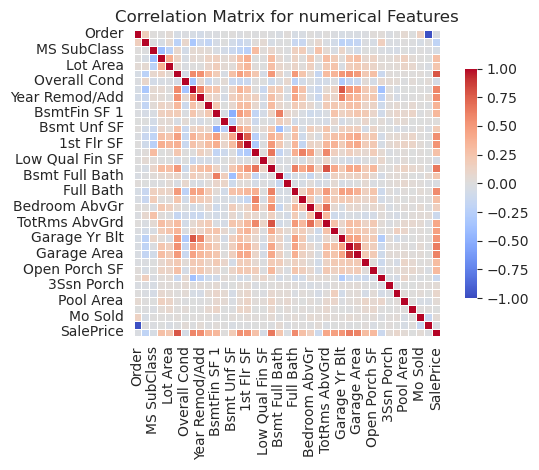

In [18]:
## Calculate and Visualize correlation matrix

correlation = df_cleaned[numerical_cols].corr()

sns.heatmap(correlation, cmap='coolwarm', center=0, vmin=-1, vmax=1, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix for numerical Features")
plt.tight_layout()


In [19]:
## Detecting More important Features that affect SalePrice

saleprice_corr = correlation['SalePrice'].sort_values(ascending=False, key=abs)

top_features = saleprice_corr[1:7]  

# Print results
print("Top 10 Features Correlated with SalePrice:")
print(top_features)

Top 10 Features Correlated with SalePrice:
Overall Qual    0.785878
Gr Liv Area     0.652255
Garage Cars     0.631196
Garage Area     0.605585
Year Built      0.592549
Full Bath       0.565246
Name: SalePrice, dtype: float64


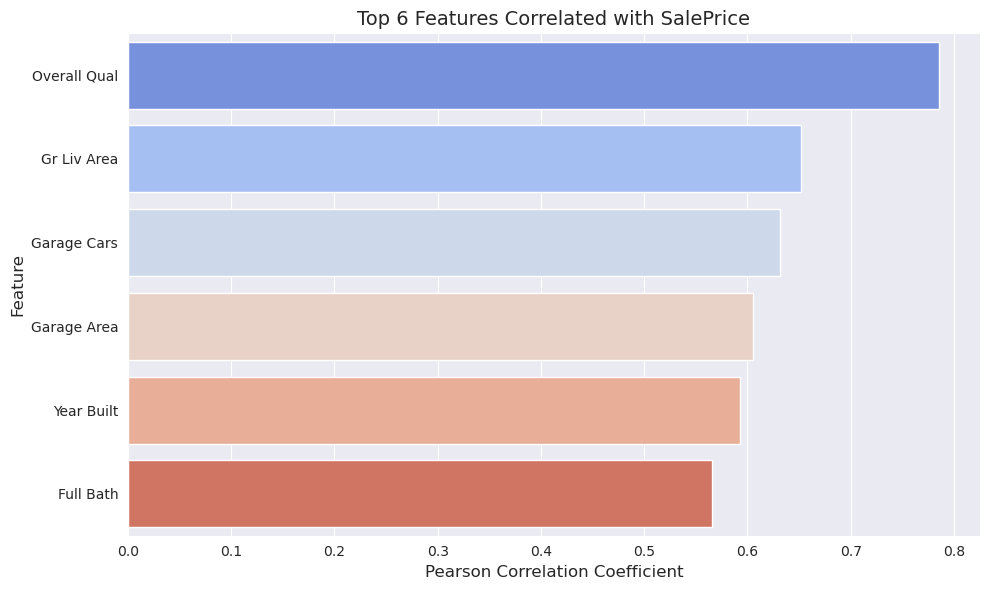

In [20]:
## Visualize top Features

plt.figure(figsize=(10, 6))



# Create bar plot with color based on correlation direction
sns.barplot(y=top_features.index, x=top_features.values, 
          palette='coolwarm' )

# Customize plot
plt.title('Top 6 Features Correlated with SalePrice', fontsize=14)
plt.xlabel('Pearson Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)


# Adjust layout and save
plt.tight_layout()

### <a id='toc2_2_'></a>[JointPlot to Visualize Important Feature](#toc0_)  

/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Figure size 1500x2000 with 0 Axes>

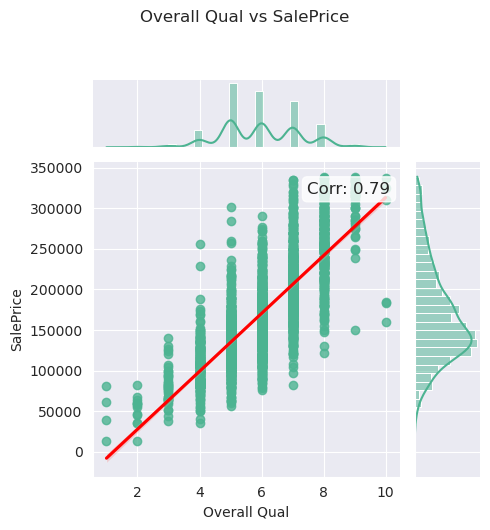

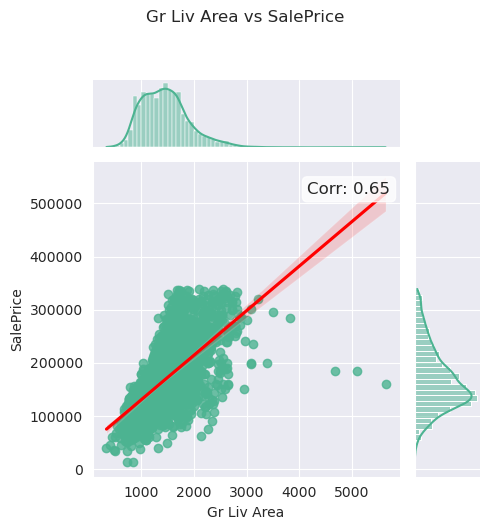

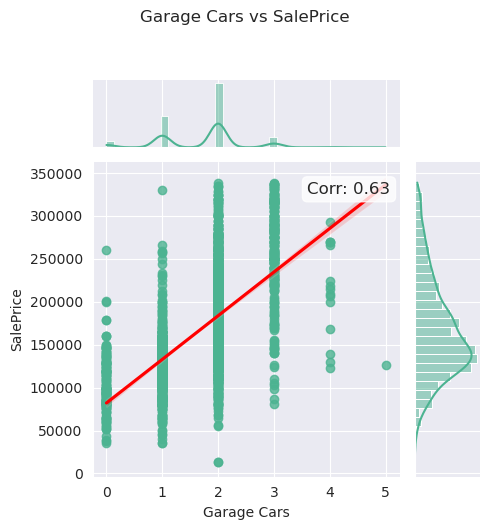

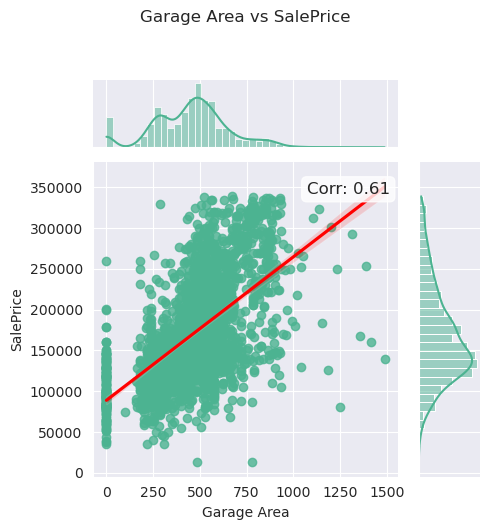

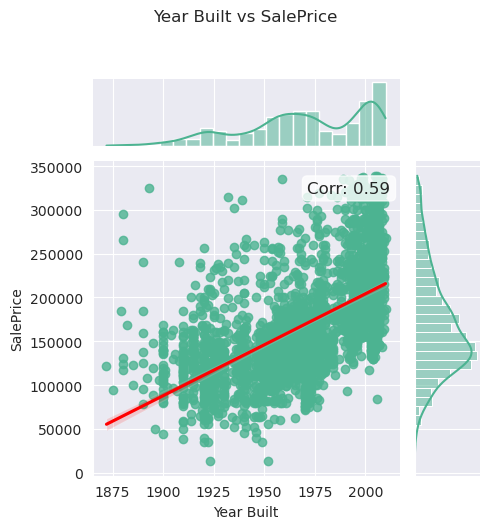

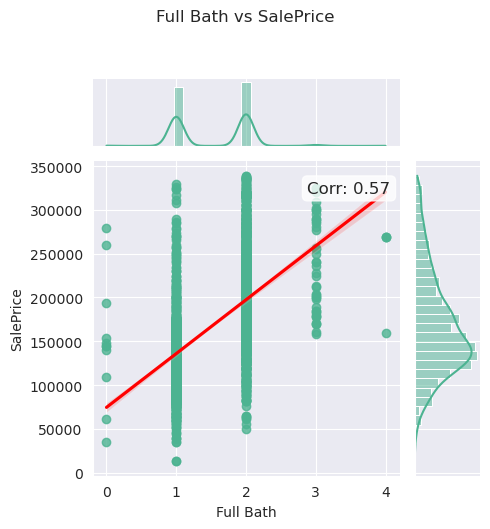

In [21]:
## Visualize top features using jointplot

plt.figure(figsize=(15, 20)) 

for i, feature in enumerate(top_features.index, 1):
    g = sns.jointplot(
        x=feature, 
        y='SalePrice', 
        data=df_cleaned, 
        kind='reg',  #
        height=5,    
        ratio=4,     
        space=0.2,   
        color='#4CB391',
        line_kws={'color': 'red'}
    )
    
    r = top_features[feature]
    g.ax_joint.annotate(
        f'Corr: {r:.2f}',
        xy=(0.7, 0.9),
        xycoords='axes fraction',
        fontsize=12,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    
    plt.suptitle(f'{feature} vs SalePrice', y=1.05)
    plt.tight_layout()

plt.show()

### <a id='toc2_3_'></a>[Preprocess the Data and Feature Selection Using SelectKBest](#toc0_)  

> We will determint best features using sklearn  `SelectKBest` method with a simple `f_regression` test. Before that we need to transform the data. Steps are: 

1. Preprocess the categorical data using `One-Hot_Encoding`, this step is crucial since training the data requires only numbers.
2. Scaling the numerical data using `StandardScaler` so that all numerical data lies between +1 to -1
3. Create Feature (X) and target (Y)
4. Select Best features based on SelectKBest with f_regressin. This basicly means train simple linear regression model with different number of features (K) and determint which model will achieve better results. The metric used in this part to compare models is **R-Squared**.
5. Create a transformed dataset based on selected features

In [22]:
## Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

X = df_cleaned.drop("SalePrice", axis=1)
y = df_cleaned["SalePrice"]

numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

X_preprocessed = preprocessor.fit_transform(X)



/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/miniconda3/envs/main/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


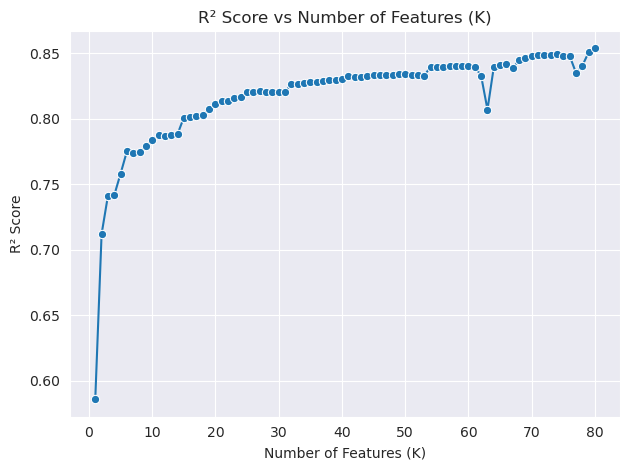

Best K (number of features): 80


In [23]:
## Selecting the best K (Number of feature)


results = []

# Loop over values of K
for k in range(1, 81):  
    selector = SelectKBest(score_func=f_regression, k=k)
    X_kbest = selector.fit_transform(X_preprocessed, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.25, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    results.append({'k': k, 'r2': r2})

results_df = pd.DataFrame(results)

# Plot K 
sns.lineplot(data=results_df, x='k', y='r2', marker='o')
plt.title("R² Score vs Number of Features (K)")
plt.xlabel("Number of Features (K)")
plt.ylabel("R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Find best K
best_k = results_df.loc[results_df['r2'].idxmax(), 'k']
print(f"Best K (number of features): {int(best_k)}")

In [24]:
## Building final Dataset

selector = SelectKBest(score_func=f_regression, k=int(best_k))
X_best = selector.fit_transform(X_preprocessed, y)


ohe = preprocessor.named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(encoded_cat_features)

# Apply mask to feature names
selected_features = np.array(all_feature_names)[selector.get_support()]
X_best_df = pd.DataFrame(X_best, columns=selected_features)

# Final dataset with selected features and target
final_df = X_best_df.copy()
final_df['SalePrice'] = y.reset_index(drop=True)

final_df

,PID,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Garage Qual_Fa,Garage Qual_None,Garage Qual_TA,Garage Cond_None,Garage Cond_TA,Paved Drive_N,Paved Drive_Y,Sale Type_New,Sale Condition_Partial,SalePrice
0,-1.031412,3.540712,3.215348,0.027819,-0.329539,-1.117697,0.169892,0.538896,-0.257696,0.163214,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,215000
1,-1.031152,0.589648,0.259011,-0.741479,-0.296255,-1.069741,-0.551960,0.132431,-0.656209,-0.325581,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,105000
2,-1.031147,0.638026,0.647114,0.027819,-0.396107,-1.213608,0.144112,1.213961,-0.339263,0.777910,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,172000
3,-1.031136,1.218564,0.191221,0.797117,-0.063267,-0.734051,-0.551960,1.551493,1.149920,2.705932,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,244000
4,-1.027150,0.299380,0.582993,-0.741479,0.901970,0.704621,-0.551960,0.900198,-0.966164,-0.212022,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,1.073188,-1.490610,-0.281693,0.027819,0.469278,0.033241,-0.551960,0.966754,-0.856631,-0.026873,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,142500
2789,1.073194,-0.039267,-0.142592,-0.741479,0.435993,-0.014715,-0.551960,-0.264526,-0.728454,-0.370016,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,131000
2790,1.073851,-0.281158,0.085721,-0.741479,0.735550,0.416887,-0.551960,-0.178955,0.054590,-0.251521,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,132000
2791,1.077562,0.444514,0.022480,-0.741479,0.136437,-0.398361,-0.551960,1.565755,-0.830996,0.926029,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,170000


## <a id='toc3_'></a>[Regression Training](#toc0_)  

> This is the final Part of our journey in HW1. After finding the best number of features (which includes all features) and preprocessing the data, it is time to fit the regressors and evaluate them. Steps are: 
1. Split the data into train and test
2. Train 4 models: Linear regression, Lasso regression, Ridge regression (with predefined alpha) and polynomial regression with n =2
3. Evaluate these models based on these metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE) and (RMSE) and R Squared
4. Compare these 4 models based on these metrics and choose the best
5. Enhance the best model by tuning the hyperparameters using hyperparameter tuning

### <a id='toc3_1_'></a>[Training 4 Models](#toc0_)  

In [25]:
# Split the data and train 4 models and store their metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline


X = final_df.drop("SalePrice", axis=1)
y = final_df["SalePrice"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "Polynomial": make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

metrics_df = pd.DataFrame(results)


In [26]:
metrics_df

,Model,MSE,RMSE,MAE,R2
0,Linear,5.743825e+08,2.396628e+04,1.627997e+04,0.840937
1,Lasso,5.274121e+08,2.296545e+04,1.530611e+04,0.853944
2,Ridge,5.250362e+08,2.291367e+04,1.527754e+04,0.854602
3,Polynomial,3.545063e+14,1.882834e+07,8.022338e+06,-98172.088584


In [27]:
## Get rid of polynomial regressor because its too weak
metrics_df = metrics_df.drop(index=3)

### <a id='toc3_2_'></a>[Comparison](#toc0_)  

Text(0.5, 0, 'Model')

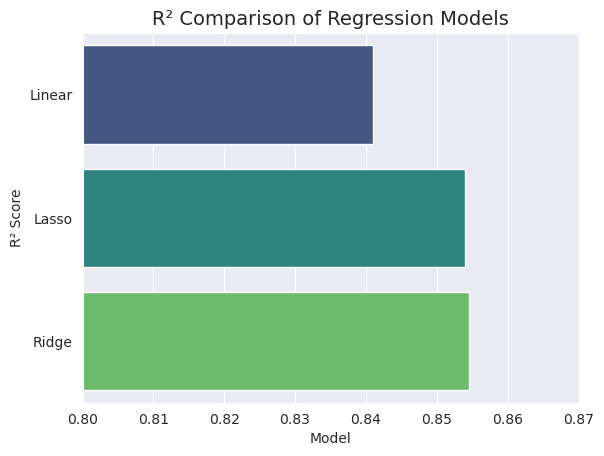

In [28]:
## R2 Comparison

sns.barplot(x = metrics_df['R2'] , y = metrics_df['Model'] , palette='viridis')
plt.xlim(0.8 , 0.87)
plt.title("R² Comparison of Regression Models" , fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("Model")


(20000.0, 25000.0)

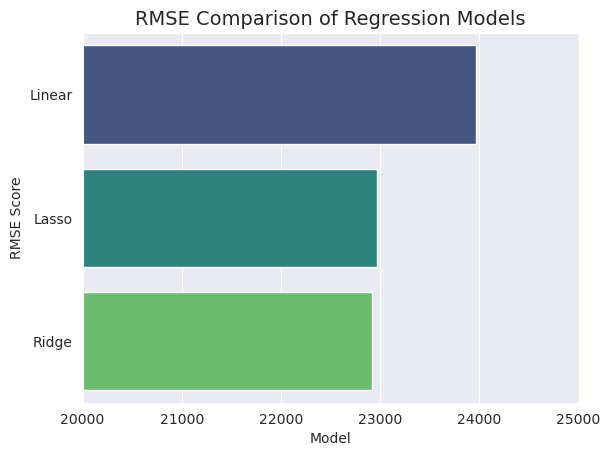

In [29]:
## RMSE Comparison

sns.barplot(x = metrics_df['RMSE'] , y = metrics_df['Model'] , palette='viridis')
plt.title("RMSE Comparison of Regression Models" , fontsize=14)
plt.ylabel("RMSE Score")
plt.xlabel("Model")
plt.xlim(20000,25000)

### <a id='toc3_3_'></a>[Enhancing The best Model](#toc0_)  

In [30]:
## Finding the best alpha using GridSearchCV

from sklearn.linear_model import  RidgeCV


alphas = np.logspace(-3, 3, 50)  

## Cross validation to find the best alpha

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True, scoring='r2')
ridge_cv.fit(X_train, y_train)

y_pred_cv = ridge_cv.predict(X_test)
mse_cv = mean_squared_error(y_test, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)
mae_cv = mean_absolute_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)

## Base Model

ridge_base = Ridge(alpha=1.0)
ridge_base.fit(X_train, y_train)
y_pred_base = ridge_base.predict(X_test)
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = np.sqrt(mse_base)
mae_base = mean_absolute_error(y_test, y_pred_base)
r2_base = r2_score(y_test, y_pred_base)

print(f"Best alpha selected by RidgeCV: {ridge_cv.alpha_}")

Best alpha selected by RidgeCV: 3.5564803062231287


In [31]:
# Step 5: Store results in DataFrame
ridge_compare_df = pd.DataFrame([
    {"Model": "Ridge (Base)", "Alpha": 1.0, "MSE": mse_base, "RMSE": rmse_base, "MAE": mae_base, "R2": r2_base},
    {"Model": "Ridge (CV)", "Alpha": ridge_cv.alpha_, "MSE": mse_cv, "RMSE": rmse_cv, "MAE": mae_cv, "R2": r2_cv}
])

In [32]:
ridge_compare_df

,Model,Alpha,MSE,RMSE,MAE,R2
0,Ridge (Base),1.00000,5.250362e+08,22913.668241,15277.541555,0.854602
1,Ridge (CV),3.55648,5.239691e+08,22890.371968,15247.689903,0.854898


Text(0.5, 0, 'Model')

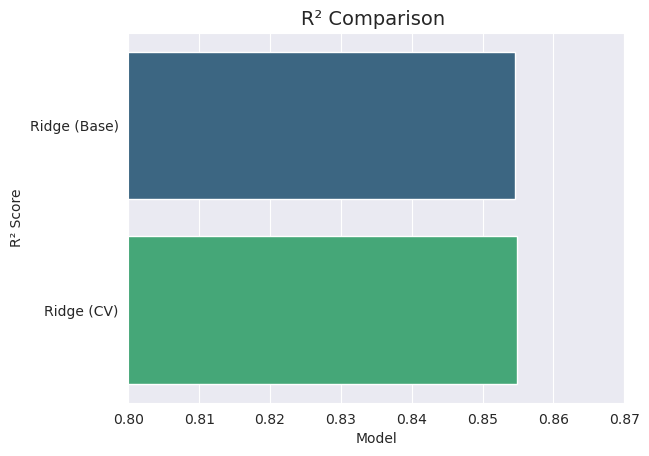

In [33]:
## R2 Comparison

sns.barplot(x = ridge_compare_df['R2'] , y = ridge_compare_df['Model'] , palette='viridis')
plt.title("R² Comparison " , fontsize=14)
plt.xlim(0.8, 0.87)
plt.ylabel("R² Score")
plt.xlabel("Model")

Text(0.5, 0, 'Model')

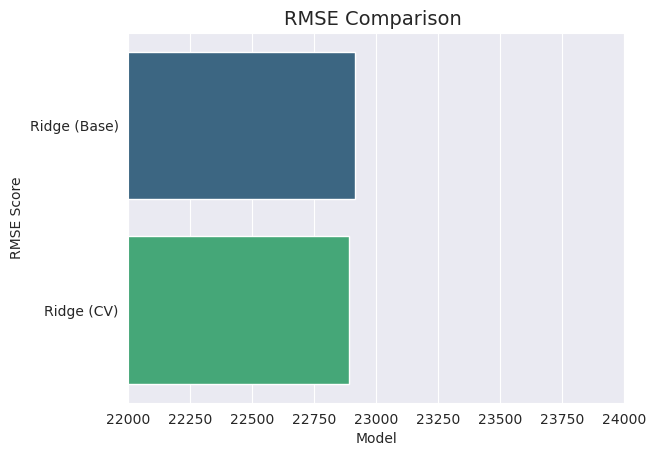

In [34]:
## RMSE Comparison

sns.barplot(x = ridge_compare_df['RMSE'] , y = ridge_compare_df['Model'] , palette='viridis')
plt.title("RMSE Comparison " , fontsize=14)
plt.xlim(22000, 24000)
plt.ylabel("RMSE Score")
plt.xlabel("Model")

## <a id='toc4_'></a>[Evaluation Metrics Explained](#toc0_)  

### <a id='toc4_1_'></a>[Mean Absolute Error (MSE) and (RMSE)](#toc0_)  

MSE is calculated by taking the average of the squared differences between predicted and actual values. It's one of the most widely used metrics for regression problems:

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

Where:
- $n$ is the number of observations
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value

RMSE is simply the square root of the MSE. It's often preferred over MSE because it's in the same units as the target variable. RMSE is calculated as:

$$ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

**These metrics have already been calculated for our models in the previous section of this notebook**

### <a id='toc4_2_'></a>[R Squared](#toc0_)  

R in a regression analysis is called the correlation coefficient and it is defined as the correlation or relationship between an independent and a dependent variable. It ranges from -1 to +1. An R-value of -1 and +1 indicates respectively a perfect negative and positive relationship between the independent and dependent variable. Thus, an R-value of 0 shows that there is no relationship between these variables. So, depending on your study, the higher the R-value, i.e. closer to -1 or +1, the better the relationship. Most often, it is expressed in percentages.  <br/> <br/>
R squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. The definition of R squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or: R squared = Explained variation / Total variation  <br/> <br/>
R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It's calculated as:

$$ R^2 = \frac{\sum_{i=1}^n (y_i - \bar{y})^2 - {\sum_{i=1}^n (y_i - \hat{y}_i)^2}}{\sum_{i=1}^n (y_i - \bar{y})^2} = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} = 1 - \frac{\text{Var}(\text{error})}{\text{Var}(Y)}  $$

Where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value
- $\bar{y}$ is the mean of the actual values

## <a id='toc5_'></a>[Bias Variance Tradeoff](#toc0_)  

The bias-variance trade-off is a fundamental concept in machine learning that provides a framework for understanding model error and the problem of overfitting. It helps us balance the complexity of our model against its ability to generalize to new data. This trade-off is crucial in choosing the right model and in applying regularization techniques effectively.

<br/>

To understand the bias-variance trade-off, we first need to break down the sources of error in our predictions. The expected prediction error of a model can be decomposed into two components:

1. **Bias:** The error introduced by approximating a real-world problem with a simplified model.
2. **Variance:** The error due to the model's sensitivity to fluctuations in the training data.

<img src="Images/bias-variance.png" width="800">



1. **High Bias (Underfitting)**
   - Symptoms: Poor performance on both training and test data
   - Characteristics: 
     - Too simple to capture the underlying pattern in the data
     - Makes strong assumptions about the data distribution
     - Examples: Linear models for complex, non-linear relationships

    **Example:** Using a linear regression to model a clearly quadratic relationship would result in high bias.

2. **High Variance (Overfitting)**
   - Symptoms: Excellent performance on training data, poor performance on test data
   - Characteristics:
     - Too complex, capturing noise in the training data
     - Highly sensitive to small fluctuations in the training set
     - Examples: High-degree polynomial models, deep neural networks with many parameters

    **Example:** Fitting a high-degree polynomial to a dataset with just a few points would likely result in high variance.


   <img src="Images/bias-variance-2.jpeg" width="800">
